In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
tweetsDf= pd.read_csv('Tweets.csv')

In [19]:
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [20]:
tweetsDf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


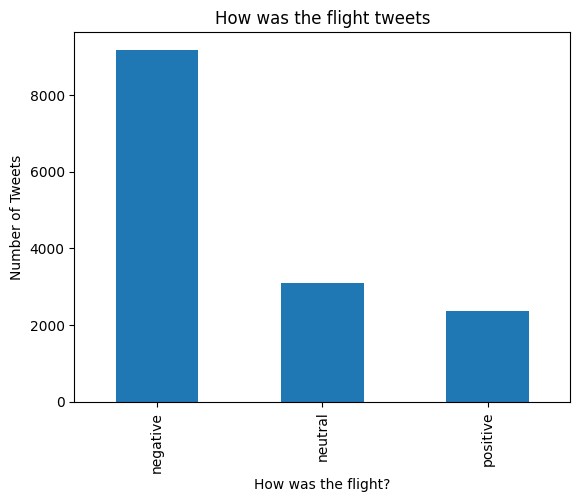

In [21]:
negativeReason = tweetsDf['airline_sentiment'].value_counts()
negativeReason.plot(kind='bar')

plt.title('How was the flight tweets')
plt.xlabel('How was the flight?')
plt.ylabel('Number of Tweets')
plt.show()

In [22]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

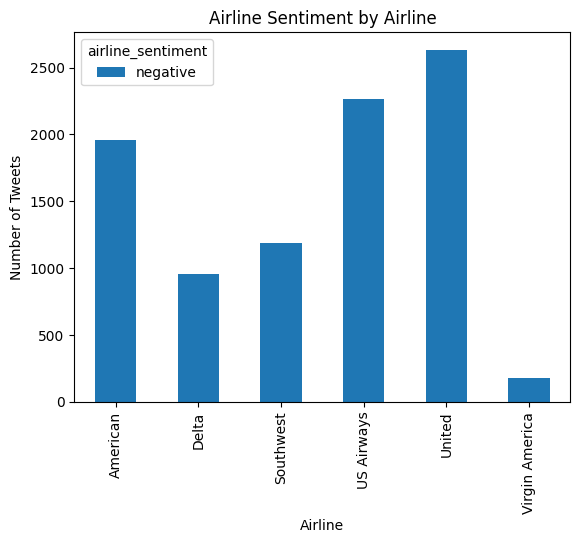

In [23]:
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

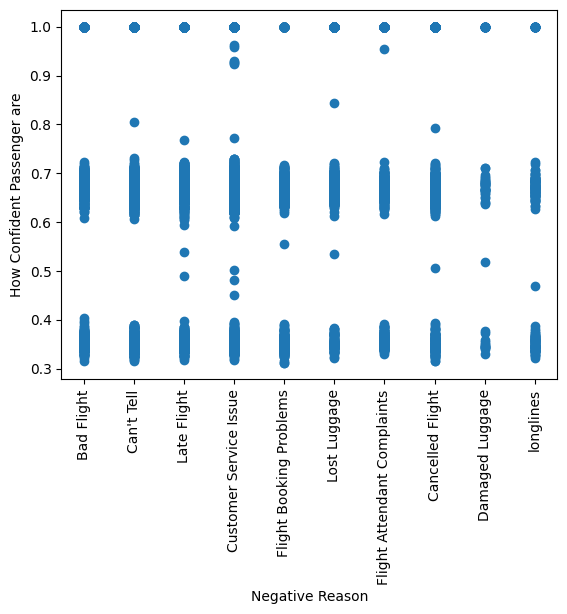

In [24]:
plt.scatter(tweetsDf['negativereason'], tweetsDf['negativereason_confidence'])
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('How Confident Passenger are')
plt.show()

In [25]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [26]:
tweetsDf.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
3,negative,1.0000,Bad Flight,0.7033,Virgin America
4,negative,1.0000,Can't Tell,1.0000,Virgin America
5,negative,1.0000,Can't Tell,0.6842,Virgin America
15,negative,0.6842,Late Flight,0.3684,Virgin America
17,negative,1.0000,Bad Flight,1.0000,Virgin America
20,negative,0.6705,Can't Tell,0.3614,Virgin America
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America
25,negative,1.0000,Customer Service Issue,1.0000,Virgin America
26,negative,1.0000,Can't Tell,0.6614,Virgin America
28,negative,1.0000,Bad Flight,1.0000,Virgin America


In [27]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print('Airline_Conf_Bucket:\n',(tweetsDf['Airline_Conf_Bucket']).head())

Airline_Conf_Bucket:
 3     (0.9, 1.0]
4     (0.9, 1.0]
5     (0.9, 1.0]
15    (0.6, 0.9]
17    (0.9, 1.0]
Name: Airline_Conf_Bucket, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.9] < (0.9, 1.0]]


In [28]:
bin = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tweetsDf['NegReason_Conf_Bucket']= pd.cut(tweetsDf['negativereason_confidence'], bin)

print('NegReason_Conf_Bucket:\n',(tweetsDf['NegReason_Conf_Bucket']).head(10))

NegReason_Conf_Bucket:
 3     (0.7, 0.8]
4     (0.9, 1.0]
5     (0.6, 0.7]
15    (0.3, 0.4]
17    (0.9, 1.0]
20    (0.3, 0.4]
24    (0.3, 0.4]
25    (0.9, 1.0]
26    (0.6, 0.7]
28    (0.9, 1.0]
Name: NegReason_Conf_Bucket, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]


<Figure size 2000x4000 with 0 Axes>

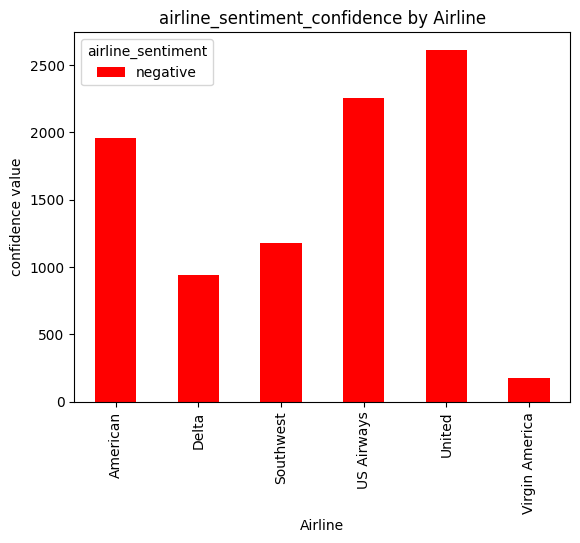

In [32]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','airline_sentiment' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True, color= 'red')
plt.title('Airline Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()